# Debugging the pi distribution issue with msprime


In [92]:
import msprime
import math
import subprocess
import os
os.chdir("/home/isaac/gimmeSAD")
import gimmeSAD
import implicit_BI
import species

print(subprocess.check_output("hostname"))

cattywampus



In [6]:
out_of_africa()


Epoch: 0 -- 848.0 generations
     start     end      growth_rate |     0        1        2    
   -------- --------       -------- | -------- -------- -------- 
0 |1.23e+04 1.23e+04              0 |     0      3e-05   1.9e-05 
1 |2.97e+04   1e+03           0.004 |   3e-05      0     9.6e-05 
2 |5.41e+04    510           0.0055 |  1.9e-05  9.6e-05     0    

Events @ generation 848.0
   - Mass migration: lineages move from 2 to 1 with probability 1.0
   - Migration rate change to 0 everywhere
   - Migration rate change for (0, 1) to 0.00025
   - Migration rate change for (1, 0) to 0.00025
   - Population parameter change for 1: initial_size -> 2100 growth_rate -> 0 

Epoch: 848.0 -- 5600.0 generations
     start     end      growth_rate |     0        1        2    
   -------- --------       -------- | -------- -------- -------- 
0 |1.23e+04 1.23e+04              0 |     0     0.00025     0    
1 | 2.1e+03  2.1e+03              0 |  0.00025     0        0    
2 |5.41e+04 2.41e-07    

In [2]:
def out_of_africa():
    # First we set out the maximum likelihood values of the various parameters
    # given in Table 1.
    N_A = 7300
    N_B = 2100
    N_AF = 12300
    N_EU0 = 1000
    N_AS0 = 510
    # Times are provided in years, so we convert into generations.
    generation_time = 25
    T_AF = 220e3 / generation_time
    T_B = 140e3 / generation_time
    T_EU_AS = 21.2e3 / generation_time
    # We need to work out the starting (diploid) population sizes based on
    # the growth rates provided for these two populations
    r_EU = 0.004
    r_AS = 0.0055
    N_EU = N_EU0 / math.exp(-r_EU * T_EU_AS)
    N_AS = N_AS0 / math.exp(-r_AS * T_EU_AS)
    # Migration rates during the various epochs.
    m_AF_B = 25e-5
    m_AF_EU = 3e-5
    m_AF_AS = 1.9e-5
    m_EU_AS = 9.6e-5
    # Population IDs correspond to their indexes in the population
    # configuration array. Therefore, we have 0=YRI, 1=CEU and 2=CHB
    # initially.
    population_configurations = [
        msprime.PopulationConfiguration(
            sample_size=0, initial_size=N_AF),
        msprime.PopulationConfiguration(
            sample_size=1, initial_size=N_EU, growth_rate=r_EU),
        msprime.PopulationConfiguration(
            sample_size=1, initial_size=N_AS, growth_rate=r_AS)
    ]
    migration_matrix = [
        [      0, m_AF_EU, m_AF_AS],
        [m_AF_EU,       0, m_EU_AS],
        [m_AF_AS, m_EU_AS,       0],
    ]
    demographic_events = [
        # CEU and CHB merge into B with rate changes at T_EU_AS
        msprime.MassMigration(
            time=T_EU_AS, source=2, destination=1, proportion=1.0),
        msprime.MigrationRateChange(time=T_EU_AS, rate=0),
        msprime.MigrationRateChange(
            time=T_EU_AS, rate=m_AF_B, matrix_index=(0, 1)),
        msprime.MigrationRateChange(
            time=T_EU_AS, rate=m_AF_B, matrix_index=(1, 0)),
        msprime.PopulationParametersChange(
            time=T_EU_AS, initial_size=N_B, growth_rate=0, population_id=1),
        # Population B merges into YRI at T_B
        msprime.MassMigration(
            time=T_B, source=1, destination=0, proportion=1.0),
        # Size changes to N_A at T_AF
        msprime.PopulationParametersChange(
            time=T_AF, initial_size=N_A, population_id=0)
    ]
    # Use the demography debugger to print out the demographic history
    # that we have just described.
    dp = msprime.DemographyDebugger(
        Ne=N_A,
        population_configurations=population_configurations,
        migration_matrix=migration_matrix,
        demographic_events=demographic_events)
    dp.print_history()

In [938]:
f = "/home/isaac/gimmeSAD/output/pidxy.txt"
lines = open(f).readlines()
print(len(lines))
lines = [x.strip().split() for x in lines]
pis = []
dxys = []
for line in lines:
    l = [float(line[0])] + [float(x.translate(None, "[],")) for x in line[2:]]
    if "pi" in line:
        pis.append(l)
    else:
        dxys.append(l)

print(len(pis))
print(len(dxys))
for line in pis:
    try:
        print("{} {}\t".format(min(line[2:]), max(line[2:]))),
    except:
        pass
print("\n")
for line in dxys:
    try:
        print("{} {}\t".format(min(line[2:]), max(line[2:]))), 
    except:
        pass

62
31
31
0.0 0.000818713450292	0.0 0.000974658869396	0.0 0.00132553606238	0.0 0.00198830409357	0.0 0.00194931773879	0.0 0.00230019493177	0.0 0.00187134502924	0.0 0.00230019493177	0.0 0.00327485380117	0.0 0.00292397660819	0.0 0.00194931773879	0.0 0.00280701754386	0.0 0.00432748538012	0.0 0.00269005847953	0.0 0.00304093567251	0.0 0.00194931773879	0.0 0.0024171539961	0.0 0.00319688109162	0.0 0.00331384015595	0.0 0.00265107212476	0.0 0.00350877192982	0.0 0.00327485380117	0.0 0.00323586744639	0.0 0.00444444444444	0.0 0.00643274853801	0.0 0.00732943469786	0.0 0.00881091617934	0.0 0.00651072124756	0.0 0.00382066276803	0.0 0.00389863547758	0.0 0.00358674463938	

0.0 0.0466666666667	0.0 0.0147368421053	0.0 0.0340350877193	0.0 0.0243859649123	0.0 0.0268421052632	0.0 0.0264912280702	0.0 0.0277192982456	0.0 0.019649122807	0.0 0.0264912280702	0.0 0.0175438596491	0.0 0.0270175438596	0.0 0.0317543859649	0.0 0.0328070175439	0.0 0.0259649122807	0.0 0.0342105263158	0.0 0.0170175438596	0.0 0.025263157894

In [939]:
print(len(pis[0]))
for pi in dxys:
    print(pi[0], min(pi[1:]), max(pi[1:]), np.mean(pi[1:]), np.median(pi[1:]))

99
(0.0526, 0.0, 0.046666666666666676, 0.0052148227712137491, 0.0034210526315789479)
(0.1094, 0.0, 0.014736842105263161, 0.0035328947368421051, 0.0028070175438596493)
(0.1644, 0.0, 0.03403508771929826, 0.0040361509835194044, 0.0028070175438596493)
(0.2238, 0.0, 0.02438596491228069, 0.0037691713560631147, 0.0028070175438596493)
(0.2628, 0.0, 0.026842105263157896, 0.0043064055487556097, 0.002631578947368421)
(0.3022, 0.0, 0.026491228070175444, 0.003660076116216467, 0.0024561403508771926)
(0.3502, 0.0, 0.027719298245614036, 0.0038219895287958114, 0.0028070175438596489)
(0.3844, 0.0, 0.019649122807017534, 0.0041200657894736844, 0.0027192982456140354)
(0.411, 0.0, 0.026491228070175437, 0.0037839522664529345, 0.0024561403508771926)
(0.4304, 0.0, 0.017543859649122806, 0.0037249689881268832, 0.0026315789473684214)
(0.4572, 0.0, 0.027017543859649128, 0.0038768489852081178, 0.002631578947368421)
(0.5068, 0.0, 0.03175438596491228, 0.0039600202429149797, 0.0028947368421052633)
(0.514, 0.0, 0.03280

In [26]:
l = "0.012807017543859649, 0.0024561403508771926, 0.0033333333333333335, 0.005614035087719299, 0.004912280701754385, 0.004035087719298246, 0.0036842105263157903, 0.009649122807017546, 0.005964912280701755, 0.027192982456140352, 0.010350877192982456, 0.0019298245614035084, 0.011403508771929824, 0.0112280701754386, 0.00543859649122807, 0.004035087719298246, 0.0035087719298245615, 0.009649122807017544, 0.0035087719298245615, 0.0015789473684210524, 0.0019298245614035089, 0.005087719298245616, 0, 0.0028070175438596493, 0.6668421052631579, 0.008771929824561403, 0.0017543859649122807, 0.00719298245614035, 0.00543859649122807, 0.0008771929824561404, 0.002105263157894737, 0.0014035087719298247, 0.011052631578947366, 0.007192982456140352, 0.0012280701754385963, 0.00824561403508772, 0.00017543859649122808, 0.0061403508771929825, 0.009298245614035087, 0.0063157894736842095, 0.0033333333333333344, 0.02456140350877193, 0.0035087719298245615, 0.0007017543859649123, 0.0059649122807017545, 0.010035087719298246, 0, 0.00719298245614035, 0.005263157894736842, 0.005263157894736842, 0.0031578947368421056, 0.002631578947368421, 0.00824561403508772, 0.008421052631578945, 0.0035087719298245615, 0.0038596491228070177, 0.0008771929824561404, 0.0028070175438596493, 0.004736842105263158, 0.0008771929824561404, 0.004035087719298246, 0.00368421052631579, 0.00456140350877193, 0.002280701754385965, 0.00368421052631579, 0.011403508771929822, 0.015578947368421053, 0.0061403508771929825, 0.0042105263157894745, 0.0026315789473684214, 0.006315789473684211, 0.010526315789473684, 0.0012280701754385963, 0.012105263157894735, 0.012456140350877193, 0.0007017543859649123, 0.01175438596491228, 0.0010526315789473686, 0.0035087719298245615, 0.0007017543859649123, 0.0017543859649122807, 0.002631578947368422, 0.0005263157894736843, 0.0010526315789473684, 0.009649122807017544, 0.015438596491228071, 0.004035087719298246, 0.011578947368421052, 0.007894736842105263, 0.011929824561403509, 0.01, 0.010526315789473684, 0.0014035087719298247, 0.010526315789473684, 0.0015789473684210524, 0.017017543859649122, 0.0010526315789473686, 0.00035087719298245617, 0.003333333333333334, 0.0008771929824561404, 0.027543859649122808, 0.009649122807017543, 0.00368421052631579, 0.0028070175438596493, 0.008596491228070177, 0, 0.0007017543859649123, 0.006491228070175438, 0.01350877192982456, 0.0029824561403508777, 0.012280701754385963, 0.0026315789473684214, 0.005263157894736842, 0.014035087719298239, 0.00543859649122807, 0.019122807017543847, 0.00543859649122807, 0.0015789473684210526, 0.0035087719298245615, 0.0035087719298245615, 0.002280701754385965, 0.00543859649122807, 0.01473684210526316, 0.0017543859649122807, 0.00982456140350877, 0.0012280701754385965, 0.0005263157894736842, 0.003157894736842105, 0.006140350877192982, 0.00719298245614035, 0.014736842105263161, 0.0019298245614035089, 0.004736842105263157, 0.005964912280701755, 0.0015789473684210526, 0.02456140350877192, 0.005789473684210527, 0.0017543859649122807, 0.007017543859649123, 0.0019298245614035089, 0.0015789473684210526, 0.005964912280701755, 0.008947368421052631, 0.01, 0.004035087719298246, 0.014736842105263152, 0.0035087719298245615, 0.00035087719298245617, 0.0005263157894736842, 0.002105263157894737, 0.0031578947368421056, 0.0033333333333333335, 0.007894736842105263, 0.0033333333333333335, 0.0015789473684210526, 0.005614035087719299, 0.005614035087719299, 0.0007017543859649123, 0.0035087719298245615, 0.0017543859649122807, 0.0021052631578947372, 0.00543859649122807, 0.014912280701754385, 0.0022807017543859656, 0.004385964912280702, 0.0038596491228070177, 0.007017543859649123, 0.00017543859649122808, 0.004736842105263158, 0.00736842105263158, 0.0043859649122807015, 0.004035087719298246, 0.00035087719298245617, 0.005087719298245614, 0.0029824561403508777, 0.0038596491228070177, 0.002631578947368421, 0.0010526315789473684, 0.010350877192982456, 0.0056140350877192996, 0.005263157894736842, 0.0031578947368421056, 0.005087719298245614"
ldat = l.split(", ")
ldat = [float(x) for x in ldat]
print(sorted(ldat))

[0.0, 0.0, 0.0, 0.00017543859649122808, 0.00017543859649122808, 0.00035087719298245617, 0.00035087719298245617, 0.00035087719298245617, 0.0005263157894736842, 0.0005263157894736842, 0.0005263157894736843, 0.0007017543859649123, 0.0007017543859649123, 0.0007017543859649123, 0.0007017543859649123, 0.0007017543859649123, 0.0008771929824561404, 0.0008771929824561404, 0.0008771929824561404, 0.0008771929824561404, 0.0010526315789473684, 0.0010526315789473684, 0.0010526315789473686, 0.0010526315789473686, 0.0012280701754385963, 0.0012280701754385963, 0.0012280701754385965, 0.0014035087719298247, 0.0014035087719298247, 0.0015789473684210524, 0.0015789473684210524, 0.0015789473684210526, 0.0015789473684210526, 0.0015789473684210526, 0.0015789473684210526, 0.0017543859649122807, 0.0017543859649122807, 0.0017543859649122807, 0.0017543859649122807, 0.0017543859649122807, 0.0019298245614035084, 0.0019298245614035089, 0.0019298245614035089, 0.0019298245614035089, 0.002105263157894737, 0.002105263157

In [941]:
import matplotlib.pyplot as plt
import numpy as np
import collections      # For Counter
import msprime
import math
# pylint: disable=C0103
# pylint: disable=R0903


class good_species(object):

    def __init__(self, UUID = "", abundance = 1, meta_abundance = 1, colonization_time = 0):
        self.name = "watdo"
        self.uuid = UUID
        self.abundance = abundance
        self.local_Ne = self.abundance * 100
        self.meta_abundance = meta_abundance
        #self.colonization_time = np.log(colonization_time)
        self.colonization_time = colonization_time
        self.Ne = meta_abundance
        self.mutation_rate = 0.000000022
#        self.mutation_rate = 0.00000007
        self.sequence_length = 570
        self.tree_sequence = []
        self.island_sample_size = 10
        self.meta_sample_size = 10

        ## Need to calculate the growth rate
        #self.r_island = -np.log(100./self.local_Ne)/self.colonization_time
        ## This one works okay.
        self.r_island = -np.log(10./self.local_Ne)/self.colonization_time
        #self.r_island = 0

        ## Stats
        self.pi = 0
        self.S = 0
        self.S_island = 0
        self.S_meta = 0
        self.pi_net = 0
        self.dxy = 0

    def __str__(self):
        return "<species {}>".format(self.name)

    def __repr__(self):
        return self.__str__()
    def simulate_seqs(self):
        ## This is hackish
        if self.Ne <= 0:
            self.Ne = 100

        island_pop = msprime.PopulationConfiguration(sample_size=self.island_sample_size,\
                                                    initial_size=self.local_Ne,
                                                    growth_rate=self.r_island)

        meta_pop = msprime.PopulationConfiguration(sample_size=self.meta_sample_size, initial_size=self.meta_abundance)

        split_event = msprime.MassMigration(time=self.colonization_time,\
                                            source=0,\
                                            destination=1,\
                                            proportion=1)

        island_rate_change_event = msprime.PopulationParametersChange(time=self.colonization_time,\
                                                                        growth_rate=0,\
                                                                        population_id=0)

        ## Useful for debugging demographic events. Mass migration and exponetial growth are both working.
        print(self.name, self.colonization_time)
        debug = msprime.DemographyDebugger(population_configurations=[island_pop, meta_pop],\
                                           demographic_events=[island_rate_change_event, split_event])
        debug.print_history()

        self.tree_sequence = msprime.simulate(length=self.sequence_length,\
                                                Ne=self.meta_abundance,\
                                                mutation_rate=self.mutation_rate, \
                                                population_configurations=[island_pop, meta_pop],\
        #                                        demographic_events=[island_rate_change_event, split_event])
                                                demographic_events=[split_event])

        #self.tree_sequence = msprime.simulate(sample_size=10, Ne=self.Ne, length=self.sequence_length, mutation_rate=self.mutation_rate)

    def get_sumstats(self):
        self.pi = self.tree_sequence.get_pairwise_diversity() / self.sequence_length
        self.S = len(next(self.tree_sequence.haplotypes()))
#        total = 0.0
#        for i in range(1, n+1):
#            total += 1.0 / i
        all_haps = self.tree_sequence.haplotypes()
        ## Get population specific haplotypes
        island_haps = [next(all_haps) for _ in range(self.island_sample_size)]
        meta_haps = [next(all_haps) for _ in range(self.meta_sample_size)]

        ## Calculate S for each population
        ## Turn to an np array and transpose it, then test if all elements
        ## are the same by making a set from each row and checking if len > 1
        ## In the transposed array rows are bases and columns are individuals
        ihaps_t = np.transpose(np.array([map(int, list(x)) for x in island_haps]))
        mhaps_t = np.transpose(np.array([map(int, list(x)) for x in meta_haps]))

        ## Counter makes a dict, so just get the counts for 2, which indicates 
        ## sites segregating in the pop
        ## S will not always == S_island + S_meta. If a site is fixed in one pop and not
        ## present in the other then S will be less than the total. If a site is segragating
        ## in both pops then S will be greater than the total.
        ## There's probably a smarter way to do this....
        self.S_island = collections.Counter([len(set(ihaps_t[x])) for x in range(len(ihaps_t))])[2]
        self.S_meta = collections.Counter([len(set(mhaps_t[x])) for x in range(len(mhaps_t))])[2]

        ## Pass in the transposed arrays, since we already have them
        self.pi_island = get_pi(ihaps_t) / self.sequence_length
        self.pi_meta = get_pi(mhaps_t) / self.sequence_length

        ## get pairwise differences between populations while ignoring differences
        ## within populations (Dxy)
        self.dxy = get_dxy(ihaps_t, mhaps_t) / self.sequence_length

        ## pi_net
        self.pi_net = self.dxy - (self.pi_island + self.pi_meta)/2


def get_pi(haplotypes):
    ## If no seg sites in a pop then haplotypes will be 0 length
    if haplotypes.size == 0:
        return 0
    n = len(haplotypes[0])
    n_comparisons = float(n) * (n - 1) / 2

    pi = 0
    for hap in haplotypes:
        k = np.count_nonzero(hap)
        pi += float(k) * (n - k) / n_comparisons
    return(pi)


def get_dxy(ihaps_t, mhaps_t):
    ## If no seg sites in a pop then haplotypes will be 0 length
    if ihaps_t.size == 0 or mhaps_t.size == 0:
        return 0

    ## Number of comparisons is == to n_island * n_metacommunity`
    ## n_metacommunity
    n_island = ihaps_t.shape[1]
    n_meta = mhaps_t.shape[1]
    n_comparisons = n_island * n_meta


    dxy = 0
    len_seq = ihaps_t.shape[0]

    ## ibases and mbases are now a list of all bases at a particular
    ## site within each population
    ## There's probably a more elegant way to do this but I was
    ## gunning for readibility. Probably failed.
    for ibases, mbases in zip(ihaps_t, mhaps_t):
        nonzeros_island = np.count_nonzero(ibases)
        nonzeros_meta = np.count_nonzero(mbases)
        zeros_island = n_island - nonzeros_island
        zeros_meta = n_meta - nonzeros_meta

        dxy += (nonzeros_island * zeros_meta \
                + zeros_island * nonzeros_meta) / float(n_comparisons)
    return dxy


('watdo', 2000000)

Epoch: 0 -- 2000000.0 generations
     start     end      growth_rate |     0        1    
   -------- --------       -------- | -------- -------- 
0 |  1e+05     10          4.61e-06 |     0        0    
1 |  1e+03    1e+03               0 |     0        0    

Events @ generation 2000000.0
   - Population parameter change for 0: growth_rate -> 0 
   - Mass migration: lineages move from 0 to 1 with probability 1

Epoch: 2000000.0 -- inf generations
     start     end      growth_rate |     0        1    
   -------- --------       -------- | -------- -------- 
0 |   10       10                 0 |     0        0    
1 |  1e+03    1e+03               0 |     0        0    



In [931]:
s = good_species(UUID=1234, colonization_time=20000, abundance=100, meta_abundance=1000)
#self.r_island = -np.log(10./self.local_Ne)/self.colonization_time
self.r_island = 0
self = s
s.island_sample_size=10
island_pop = msprime.PopulationConfiguration(sample_size=self.island_sample_size,\
                                                    initial_size=self.local_Ne,
                                                    growth_rate=self.r_island)

meta_pop = msprime.PopulationConfiguration(sample_size=self.meta_sample_size, initial_size=self.meta_abundance)

split_event = msprime.MassMigration(time=self.colonization_time,\
                                            source=0,\
                                            destination=1,\
                                            proportion=1)

island_size_change_event = msprime.PopulationParametersChange(time=self.colonization_time-1,\
                                                                        initial_size=0,\
                                                                        population_id=0)

## Useful for debugging demographic events. Mass migration and exponetial growth are both working.
print(self.name, self.colonization_time)
debug = msprime.DemographyDebugger(population_configurations=[island_pop, meta_pop],\
                                           demographic_events=[island_size_change_event, split_event])
#debug.print_history()

self.tree_sequence = msprime.simulate(length=self.sequence_length,\
                                                Ne=1000,\
                                                mutation_rate=self.mutation_rate, \
                                                population_configurations=[island_pop, meta_pop],\
        #                                        demographic_events=[island_rate_change_event, split_event])
                                                demographic_events=[island_size_change_event, split_event])
pi = self.tree_sequence.get_pairwise_diversity() / self.sequence_length
S = len(next(self.tree_sequence.haplotypes()))
all_haps = self.tree_sequence.haplotypes()
## Get population specific haplotypes
island_haps = [next(all_haps) for _ in range(self.island_sample_size)]
meta_haps = [next(all_haps) for _ in range(self.meta_sample_size)]
print(island_haps)
print(meta_haps)
ihaps_t = np.transpose(np.array([map(int, list(x)) for x in island_haps]))
mhaps_t = np.transpose(np.array([map(int, list(x)) for x in meta_haps]))
print(ihaps_t)
print(mhaps_t)
print(get_dxy(ihaps_t, mhaps_t)/self.sequence_length)

tot = 0.
for i in island_haps:
    tmp_tot = 0.
    for j in meta_haps:
        tmp_tot += (sum(a != b for (a,b) in zip(i, j)) / float(len(island_haps)))
    tot += tmp_tot
print(tot/self.sequence_length/len(island_haps))

('watdo', 20000)
['0010001000', '0010101000', '0010001000', '0010001000', '0010001000', '0010001000', '0010001000', '0010001000', '0010001000', '0010001000']
['0000010001', '0000000110', '0000000001', '0001000001', '0100000001', '0000000001', '0000000001', '0000000110', '1000000001', '0000000001']
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1 0 1 1]]
0.00649122807018
0.00649122807018


In [50]:
if True:
    if True:
        ihaps_t = np.transpose(np.array([map(int, list(x)) for x in island_haps]))
        mhaps_t = np.transpose(np.array([map(int, list(x)) for x in meta_haps]))

        ## Counter makes a dict, so just get the counts for 2, which indicates 
        ## sites segregating in the pop
        ## S will not always == S_island + S_meta. If a site is fixed in one pop and not
        ## present in the other then S will be less than the total. If a site is segragating
        ## in both pops then S will be greater than the total.
        ## There's probably a smarter way to do this....
        self.S_island = collections.Counter([len(set(ihaps_t[x])) for x in range(len(ihaps_t))])[2]
        self.S_meta = collections.Counter([len(set(mhaps_t[x])) for x in range(len(mhaps_t))])[2]

        ## Pass in the transposed arrays, since we already have them
        self.pi_island = get_pi(ihaps_t) / self.sequence_length
        self.pi_meta = get_pi(mhaps_t) / self.sequence_length

        ## get pairwise differences between populations while ignoring differences
        ## within populations (Dxy)
        self.dxy = get_dxy(ihaps_t, mhaps_t) / self.sequence_length

        ## pi_net
        self.pi_net = self.dxy - (self.pi_island + self.pi_meta)/2
        
        print(get_pi(ihaps_t))
        print(get_pi(mhaps_t))
        print(get_dxy(ihaps_t, mhaps_t))
        print(self.pi_island)
        print(self.pi_meta)
        print(self.dxy)
        print(self.S_island)
        print(self.S_meta)

3.48888888889
3.44444444444
58.2
0.00612085769981
0.00604288499025
0.102105263158
14
13


In [871]:
def do_stuff(coltime=100000, abund=100000, meta_abund=1000000):
    s = good_species(UUID=1234, colonization_time=coltime, abundance=abund, meta_abundance=meta_abund)
    s.r_island = -np.log(1./s.local_Ne)/s.colonization_time
    s.r_island = 0
    self = s
    s.island_sample_size=10
    island_pop = msprime.PopulationConfiguration(sample_size=self.island_sample_size,\
                                                        initial_size=self.local_Ne,
                                                        growth_rate=self.r_island)

    meta_pop = msprime.PopulationConfiguration(sample_size=self.meta_sample_size, initial_size=self.meta_abundance)

    split_event = msprime.MassMigration(time=self.colonization_time,\
                                                source=0,\
                                                destination=1,\
                                                proportion=1)

    island_rate_change_event = msprime.PopulationParametersChange(time=self.colonization_time-1,\
                                                                            growth_rate=0,\
                                                                            population_id=0)
    island_size_change_event = msprime.PopulationParametersChange(time=self.colonization_time-1,\
                                                                            initial_size=0,\
                                                                            population_id=0)

    ## Useful for debugging demographic events. Mass migration and exponetial growth are both working.
    #print(self.name, self.colonization_time)
    debug = msprime.DemographyDebugger(population_configurations=[island_pop, meta_pop],\
                                               demographic_events=[island_rate_change_event, island_size_change_event, split_event])
    #debug.print_history()

    self.tree_sequence = msprime.simulate(length=self.sequence_length,\
                                                    Ne=self.meta_abundance,\
                                                    mutation_rate=self.mutation_rate, \
                                                    population_configurations=[island_pop, meta_pop],\
                                                    demographic_events=[island_rate_change_event, island_size_change_event, split_event])
            #                                        demographic_events=[split_event])
    next(self.tree_sequence.trees()).draw("/home/isaac/gimmeSAD/ipython-notebooks/tree.svg", 800, 800)
    pi = self.tree_sequence.get_pairwise_diversity() / self.sequence_length
    S = len(next(self.tree_sequence.haplotypes()))
    all_haps = self.tree_sequence.haplotypes()
    ## Get population specific haplotypes
    island_haps = [next(all_haps) for _ in range(self.island_sample_size)]
    meta_haps = [next(all_haps) for _ in range(self.meta_sample_size)]
    #print(island_haps)
    #print(meta_haps)
    if True:
        ihaps_t = np.transpose(np.array([map(int, list(x)) for x in island_haps]))
        mhaps_t = np.transpose(np.array([map(int, list(x)) for x in meta_haps]))

        ## Counter makes a dict, so just get the counts for 2, which indicates 
        ## sites segregating in the pop
        ## S will not always == S_island + S_meta. If a site is fixed in one pop and not
        ## present in the other then S will be less than the total. If a site is segragating
        ## in both pops then S will be greater than the total.
        ## There's probably a smarter way to do this....
        self.S_island = collections.Counter([len(set(ihaps_t[x])) for x in range(len(ihaps_t))])[2]
        self.S_meta = collections.Counter([len(set(mhaps_t[x])) for x in range(len(mhaps_t))])[2]

        ## Pass in the transposed arrays, since we already have them
        self.pi_island = get_pi(ihaps_t) / self.sequence_length
        self.pi_meta = get_pi(mhaps_t) / self.sequence_length

        ## get pairwise differences between populations while ignoring differences
        ## within populations (Dxy)
        self.dxy = get_dxy(ihaps_t, mhaps_t) / self.sequence_length

        ## pi_net
        self.pi_net = self.dxy - (self.pi_island + self.pi_meta)/2
        
#        print(get_pi(ihaps_t))
#        print(get_pi(mhaps_t))
#        print(get_dxy(ihaps_t, mhaps_t))
        #print("{}\t{}\t{}\t{}\t{}".format(self.pi_island, self.pi_meta, self.dxy, self.S_island, self.S_meta))
        return self, self.pi_island, self.pi_meta, self.dxy, self.S_island, self.S_meta

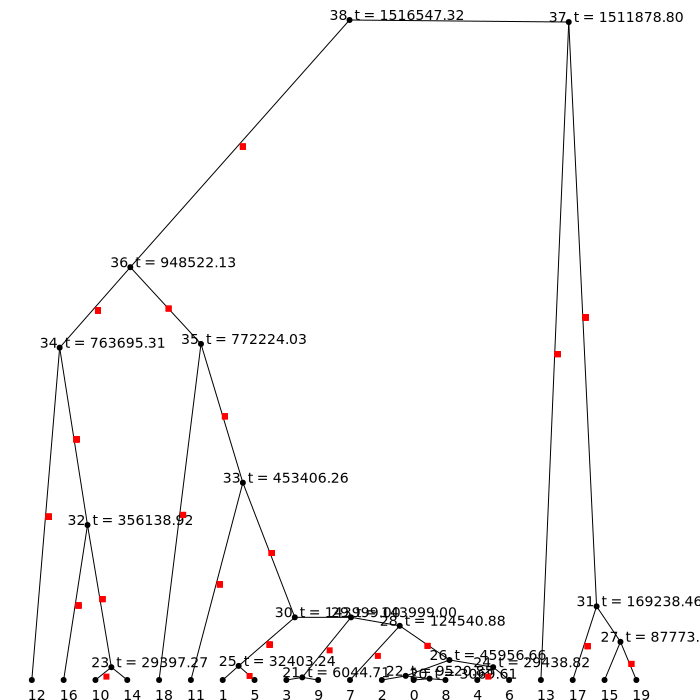

(0.004444444444444445, 0.11555555555555543, 0.19087719298245578)


In [892]:
from IPython.display import SVG, display
tree_file = "/home/isaac/gimmeSAD/ipython-notebooks/tree.svg"
display(SVG(url="file://"+tree_file))
s, pi_i, pi_m, dxy, s_i, s_m = do_stuff(144000, 630, 9126)
print(pi_i, pi_m, dxy)
next(s.tree_sequence.trees()).draw(tree_file, 700, 700, show_times=True)


In [948]:
count = 100.


for coltime in [2000, 20000, 200000, 2000000, 5000000]:
    for size in [200]:#[2, 20, 200]:
        tpi = 0
        tpm = 0
        dxy = 0
        si = 0
        sm = 0
        maxdx = 0
        for j in range(int(count)):
            s, pi, pm, dx, i, m = do_stuff(coltime, size*10, 92400)
            tpi += pi
            tpm += pm
            dxy += dx
            si += i
            sm += m
            if dx > maxdx:
                maxdx = dx
        print(size, coltime, tpi/count, tpm/count, dxy/count, maxdx, si/count, sm/count)

(200, 2000, 0.00010175438596491224, 0.007996491228070179, 0.007638596491228069, 0.024912280701754382, 0.29, 12.73)
(200, 20000, 0.000812475633528265, 0.00826744639376218, 0.009761403508771933, 0.038245614035087715, 2.17, 13.4)
(200, 200000, 0.006674463937621834, 0.007744639376218325, 0.016208771929824565, 0.05596491228070173, 12.62, 12.65)
(200, 2000000, 0.017892397660818717, 0.007761793372319688, 0.09405087719298248, 0.13877192982456138, 28.42, 12.38)
(200, 5000000, 0.020592982456140344, 0.008978167641325537, 0.22952631578947374, 0.2791228070175438, 31.93, 14.11)


(2000, 6.21052631578947e-05, 0.008022573099415207, 0.008171578947368424, 0.161, 13.009)
(20000, 0.000516218323586743, 0.016486471734892778, 0.0174780701754386, 1.237, 26.516)
(200000, 0.0034390643274853734, 0.024576023391812894, 0.03373315789473681, 7.608, 39.496)
(2000000, 0.016960974658869414, 0.03288549707602341, 0.12974666666666665, 33.221, 52.985)
(5000000, 0.03850631578947366, 0.04065372319688109, 0.35785140350877226, 72.013, 65.597)

In [695]:
import os
os.chdir("/home/isaac/gimmeSAD")
import gimmeSAD
import implicit_BI
import species

data = implicit_BI.implicit_BI(K=5000, colrate=0.03)
data.set_metacommunity("metacommunity_LS4.txt")
data.prepopulate(mode="volcanic")
data.step(100)
data.simulate_seqs()
diversity_stats = dict([(s.uuid[0], (s.pi_island, s.dxy)) for s in data.get_species()])
print([x[0] for x in diversity_stats.values()])
for i, s in enumerate(data.get_species()):
    print(i, s)
    s.simulate_seqs()
    s.get_sumstats()
    print(s)
    print("\n")
print(data.current_time)

('Mamestra richteri', 81)
('Acyrthosiphon crudus', 74)
('Altica canadensisella', 99)
('Nuculaspis oleae', 97)
[0.029668615984405445, 0.08791423001949322, 0.04440545808966858, 0.07953216374269002]
(0, <species Mamestra richteri/coltime 81/local Ne 100/meta Ne 507700/pi_island 0.0879142300195/pi_meta 0.0985964912281/dxy 0.0876842105263/S_island 109/S_meta 146>)
('Mamestra richteri', 81)
<species Mamestra richteri/coltime 81/local Ne 100/meta Ne 507700/pi_island 0.0200389863548/pi_meta 0.0277972709552/dxy 0.0303859649123/S_island 35/S_meta 46>


(1, <species Acyrthosiphon crudus/coltime 74/local Ne 100/meta Ne 914200/pi_island 0.0795321637427/pi_meta 0.0741130604288/dxy 0.086701754386/S_island 94/S_meta 110>)
('Acyrthosiphon crudus', 74)
Bad pi <species Acyrthosiphon crudus/coltime 74/local Ne 100/meta Ne 914200/pi_island 0.12514619883/pi_meta 0.152475633528/dxy 0.130245614035/S_island 158/S_meta 243>
('Acyrthosiphon crudus', 74)
<species Acyrthosiphon crudus/coltime 74/local Ne 100/meta 

<species Altica canadensisella/coltime 99/local Ne 100/meta Ne 974100/pi_island 0.0164912280702/pi_meta 0.0676803118908/dxy 0.0731228070175/S_island 47/S_meta 130>


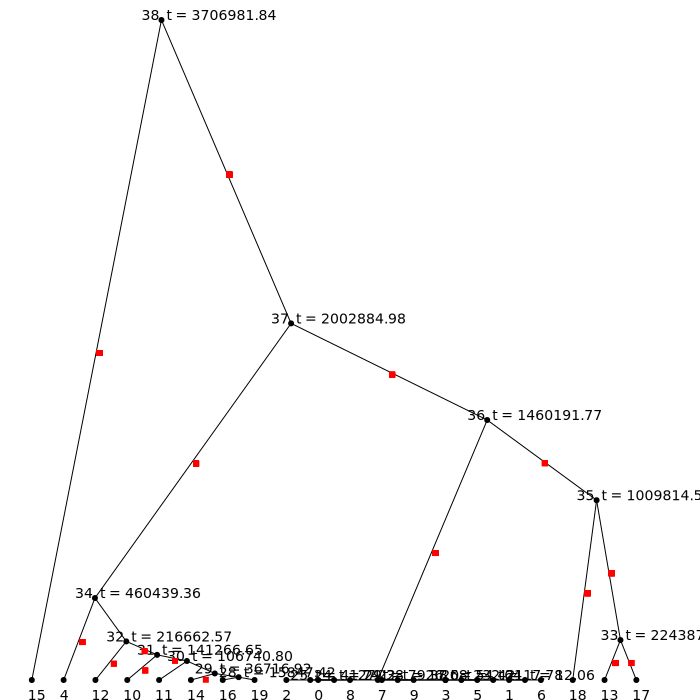

In [974]:
from IPython.display import SVG, display
tree_file = "/home/isaac/gimmeSAD/ipython-notebooks/tree.svg"
s = data.get_species()[2]
print(s)
next(s.tree_sequence.trees()).draw(tree_file, 700, 700, show_times=True)
display(SVG(url="file://"+tree_file))

In [530]:
def simulate_seqs(data):
    if True:
        data.species_objects = []
        ## Setting colonization_time as a scaling factor rather than as a raw tdiv
        ## The old way of doing this is `self.current_time - tdiv`
        #self.species_objects = [species(UUID=UUID, colonization_time=1/float(tdiv), abundance=self.local_community.count(UUID),\
        for UUID, tdiv in data.divergence_times.items():
            #print(self.local_community)
            if UUID in data.local_community:
                meta_abundance = -1
                for x, y in data.species:
                    if UUID[0] == x:
                        meta_abundance = y
                #meta_abundance = [x[1] for x in self.abundances if x[0] == UUID[0]]
                #meta_abundance = self.abundances[self.species.index(UUID[0])]
                abundance = data.local_community.count(UUID)
                #print(self.local_community)
                data.species_objects.append(species.species(UUID=UUID, colonization_time=data.current_time - tdiv,\
                                        abundance=abundance,\
                                        meta_abundance=meta_abundance))

        for s in data.species_objects:
            s.simulate_seqs()
            s.get_sumstats()

In [593]:
for s in data.species_objects:
    print(do_stuff(s.colonization_time, s.local_Ne, s.Ne))
    print(s)

(4.446159844054613, 7.100584795320816, 6.898385964912203, 7226, 9999)
<species Balclutha rotundata/coltime 152/local Ne 100/meta Ne 869100/pi_island 0.0145419103314/pi_meta 0.0386744639376/dxy 0.0413684210526/S_island 33/S_meta 58>
(4.241286549707768, 5.277933723196909, 5.059719298245794, 6210, 8043)
<species Amphicerus americana/coltime 57/local Ne 100/meta Ne 894800/pi_island 0.0471734892788/pi_meta 0.0408576998051/dxy 0.0459298245614/S_island 68/S_meta 93>
(0.0, 5.983820662767644, 7.8271929824552995, 0, 9642)
<species Dermacentor perseae/coltime 430/local Ne 100/meta Ne 723800/pi_island 0.0/pi_meta 0.0494346978558/dxy 0.0610526315789/S_island 0/S_meta 87>
(0.00035087719298245617, 2.1299415204679866, 2.8428070175438074, 1, 4199)
<species Cryptococcus aureocincta/coltime 243/local Ne 100/meta Ne 291200/pi_island 0.00116959064327/pi_meta 0.0153606237817/dxy 0.0105263157895/S_island 2/S_meta 27>
(6.02822612085748, 7.930955165691843, 8.513017543859688, 7165, 10020)
<species Dendroctonus 

In [536]:
simulate_seqs(data)
for s in data.species_objects:
    print(s)
    print(s.pi_island, s.pi_meta, s.dxy)

('Balclutha rotundata', 152)
('Amphicerus americana', 57)
('Dermacentor perseae', 430)
('Cryptococcus aureocincta', 243)
('Dendroctonus betulella', 78)
Bad pi <species Dendroctonus betulella/coltime 78/local Ne 100/meta Ne 656400/pi_island 0.0972709551657/pi_meta 0.148382066277/dxy 0.152456140351/S_island 159/S_meta 174>
('Dendroctonus betulella', 78)
('Callidium unipuncta', 882)
('Epiblema persicae', 686)
('Liriomyza pomi', 587)
('Schreckensteinia thrax', 195)
('Epicauta consobrina', 86)
('Erionota crotchi', 172)
('Ptinus tremuloidiella', 695)
('Euura cautella', 670)
('Atteva clitus', 375)
('Sceliphron dentata', 174)
Bad pi <species Sceliphron dentata/coltime 174/local Ne 100/meta Ne 879500/pi_island 0.171228070175/pi_meta 0.182261208577/dxy 0.179333333333/S_island 183/S_meta 214>
('Sceliphron dentata', 174)
('Paradiplosis uncatoides', 637)
('Podosesia americana', 271)
('Enoclerus vexabilis', 908)
('Dolichovespula aurantii', 129)
('Phyllobius fasciatus', 675)
('Diaphorina crudus', 837

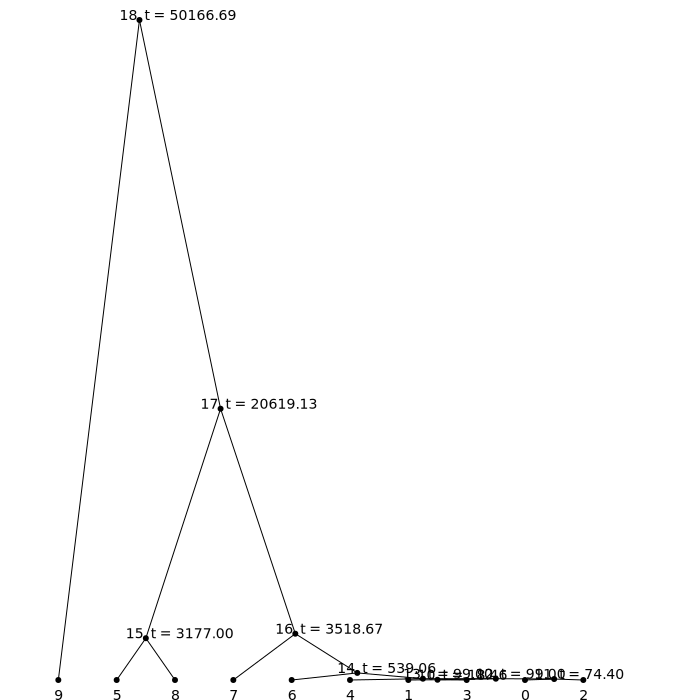

In [820]:
from IPython.display import SVG, display
tree_file = "/home/isaac/gimmeSAD/ipython-notebooks/tree.svg"
def test_two_pops_multiple_samples():
    if True:
        # Made absolutely sure that all samples have coalesced within
        # the source deme
        n = 10
        t = 100
        population_configurations = [
            msprime.PopulationConfiguration(sample_size=n // 2, initial_size=1000),
            msprime.PopulationConfiguration(sample_size=n // 2, initial_size=10000),
            msprime.PopulationConfiguration(0),
        ]
        demographic_events = [
            msprime.PopulationParametersChange(time=t-1, initial_size=0, population_id=0),
            msprime.MassMigration(time=t, source=0, destination=1)
            #msprime.MassMigration(time=t, source=1, destination=2),
        ]
        ts = msprime.simulate(
            population_configurations=population_configurations,
            demographic_events=demographic_events)
        tree = next(ts.trees())
        tree.draw(tree_file, 700, 700, show_times=True)
        display(SVG(url="file://"+tree_file))
        
        
        assert (tree.get_root() == 2 * n - 2)
        assert (tree.get_time(tree.get_root()) > t)
        for j in range(n // 2):
            assert (tree.get_population(j) == 0)
            assert (tree.get_population(n // 2 + j) == 1)
            assert (ts.get_population(j) == 0)
            assert (ts.get_population(n // 2 + j) == 1)
        assert (tree.get_population(tree.get_root()) == 1)
        assert (ts.get_samples(0) == list(range(n // 2)))
        assert (ts.get_samples(1) == list(range(n // 2, n)))
        assert (ts.get_samples(2) == [])
test_two_pops_multiple_samples()

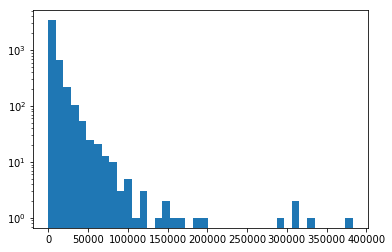

In [969]:
dat = open("/home/isaac/gimmeSAD/output/extinction_times.txt").read()
dat = dat.split("[")[1].split("]")[0]
dat = dat.split(", ")
dat = [int(x) for x in dat]
plt.hist(dat, bins=40, normed=False)
plt.yscale('log', nonposy='clip', log=10)
plt.show()

In [971]:
" ".join([str(x) for x in [1,2,3,4]])

'1 2 3 4'